# Standardization 

In [115]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# Load dataset 
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [117]:
#to remove unwanted columns - {User ID, Gender}
df = df.iloc[:,2:]

In [118]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [119]:
df.sample(5)

,Age,EstimatedSalary,Purchased
328,36,118000,1
52,29,83000,0
209,46,22000,0
260,35,77000,0
135,23,63000,0


### train-test-split

In [120]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),
                                                 df['Purchased'],
                                                 test_size=0.3,
                                                 random_state=0)

X_train.shape , X_test.shape

((280, 2), (120, 2))

### Standard-Scaler

In [121]:
from sklearn.preprocessing import StandardScaler

#made an object of the class StandardScaler
scaler=StandardScaler()

#fit the scaler to the train set , it will learn the parameters
scaler.fit(X_train)   #to learn the statistics (parameters) from the training data.

#transform train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

* standardscaler takes in df and gives numpy array

In [122]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [123]:
X_train # df

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [124]:
X_train_scaled # numpy array

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [125]:
# we gave a df and got back numpy array  so we convert to df
X_train_scaled = pd.DataFrame(X_train_scaled , columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns=X_test.columns)

In [126]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [127]:
X_train_scaled.shape , X_test_scaled.shape

((280, 2), (120, 2))

In [128]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [129]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### Effect of scaling


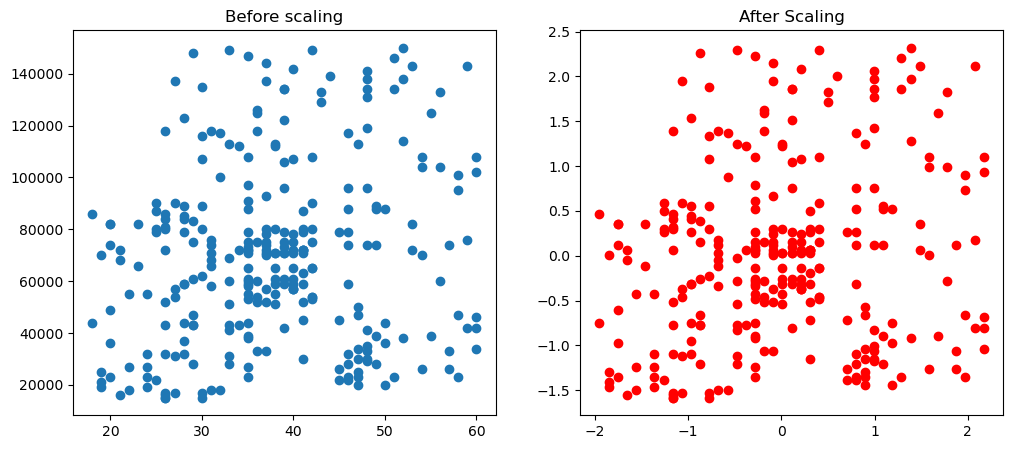

In [130]:

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')
plt.show()

<Axes: title={'center': 'After scaling'}, xlabel='Age', ylabel='Density'>

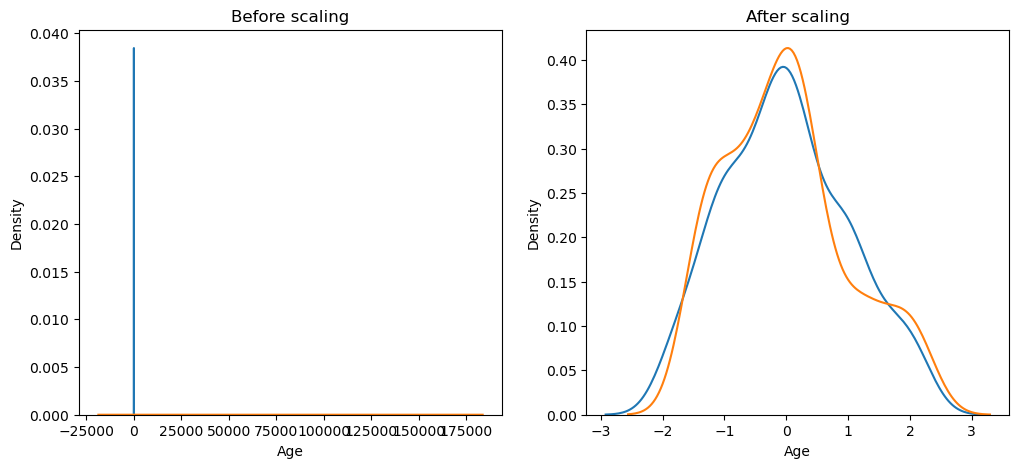

In [131]:
#ploting pdf
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title('Before scaling')
sns.kdeplot(X_train['Age'] , ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#After scaling
ax2.set_title('After scaling')
sns.kdeplot(X_train_scaled['Age'] , ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

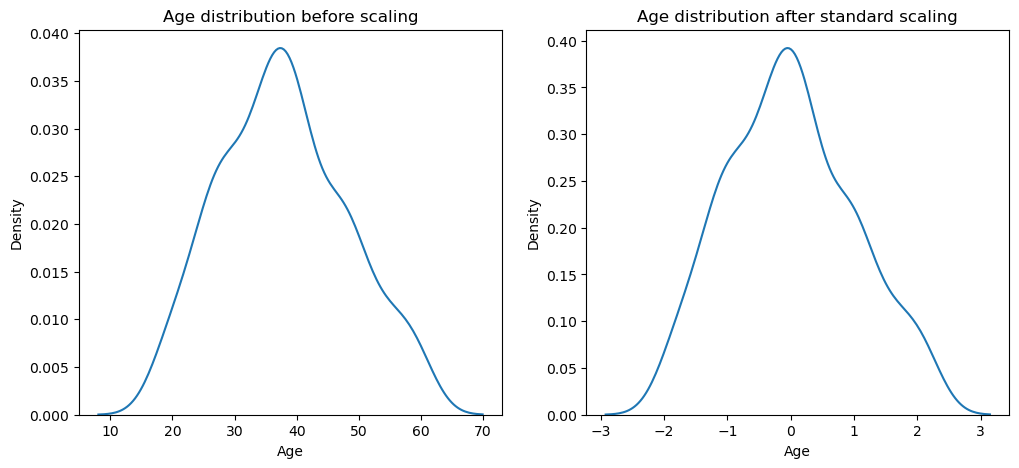

In [132]:
#comparison of distributions

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title('Age distribution before scaling')
sns.kdeplot(X_train['Age'] , ax=ax1)

#after scaling
ax2.set_title('Age distribution after standard scaling')
sns.kdeplot(X_train_scaled['Age'] , ax=ax2)

plt.show()


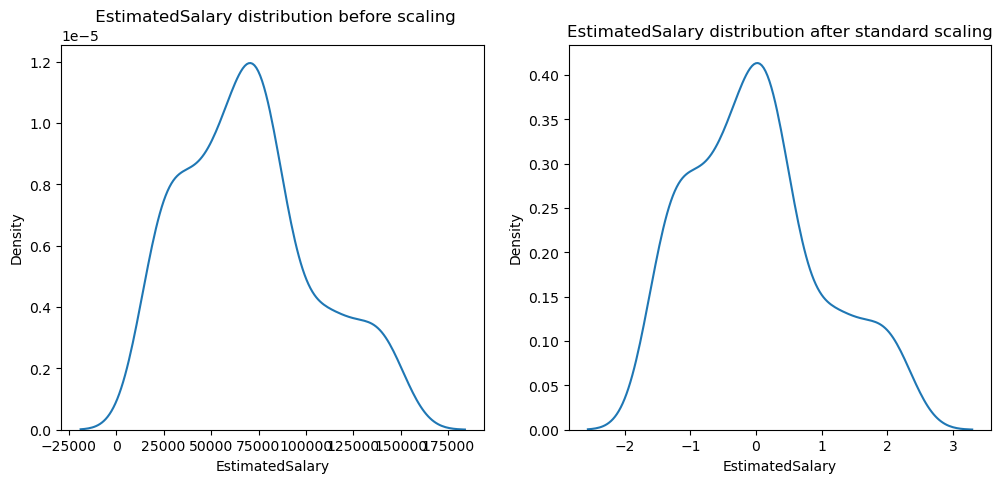

In [133]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title(' EstimatedSalary distribution before scaling')
sns.kdeplot(X_train['EstimatedSalary'] , ax=ax1)

#after scaling
ax2.set_title('EstimatedSalary distribution after standard scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'] , ax=ax2)

plt.show()


### why scaling is important


In [134]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [135]:
lr.fit(X_train , y_train)
lr_scaled.fit(X_train_scaled , y_train)

LogisticRegression()

In [136]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [137]:
print(X_test.head(5))
print(X_test_scaled.head(5))

     Age  EstimatedSalary
132   30            87000
309   38            50000
341   35            75000
196   30            79000
246   35            50000
        Age  EstimatedSalary
0 -0.771013         0.497201
1  0.013305        -0.572804
2 -0.280814         0.150172
3 -0.771013         0.265849
4 -0.280814        -0.572804


In [138]:
print('Actual' , accuracy_score(y_test , y_pred))
print('scaled' , accuracy_score(y_test , y_pred_scaled))

Actual 0.875
scaled 0.8666666666666667


In [139]:
#Decision Tree model
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt_scaled = DecisionTreeClassifier(random_state=42)

In [140]:
# train models 
dt.fit(X_train , y_train)
dt_scaled.fit(X_train_scaled , y_train)

DecisionTreeClassifier(random_state=42)

In [141]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [142]:
print('Actual' , accuracy_score(y_test , y_pred))
print('scaled' , accuracy_score(y_test , y_pred_scaled))

Actual 0.875
scaled 0.8666666666666667


In [143]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Effect of outlier

In [144]:
import pandas as pd

df = pd.concat(
    [df, pd.DataFrame({'Age':[5,90,95],
                       'EstimatedSalary':[1000,250000,350000],
                       'Purchased':[0,1,1]})],
    ignore_index=True
)

print(df)


     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
398   36            33000          0
399   49            36000          1
400    5             1000          0
401   90           250000          1
402   95           350000          1

[403 rows x 3 columns]


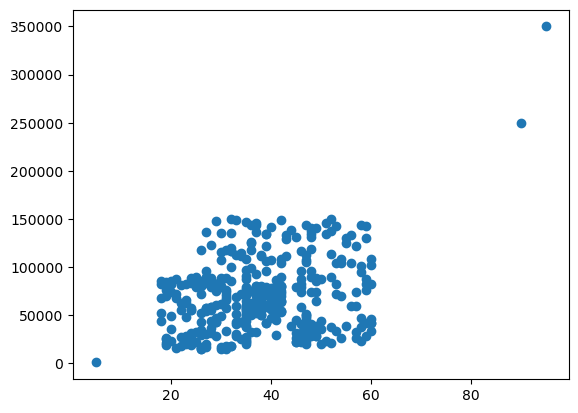

In [145]:
plt.scatter(df['Age'] , df['EstimatedSalary'])

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape , X_test.shape

((282, 2), (121, 2))

In [147]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [148]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

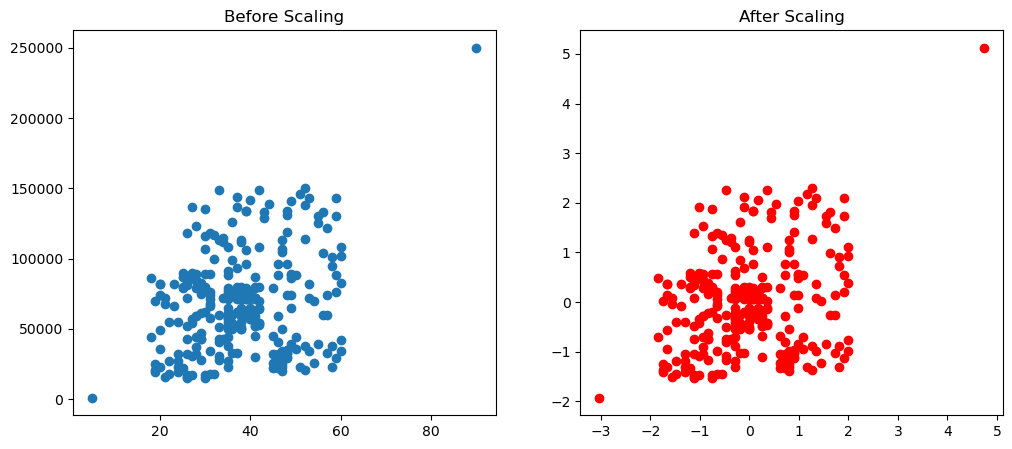

In [149]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

* after scaling the outlier exists 
* so the standardization does'nt remove outliers 